In [1]:
import pandas as pd
import numpy as np
import sklearn.metrics

In [2]:
! pwd

/c/homeworks/hse_recsys2020/HomeWorks


In [3]:
! ls ../data

members.csv
sample_submission.csv
song_extra_info.csv
songs.csv
test.csv
train.csv


In [4]:
data_df = pd.read_csv('../data/train.csv')
songs_df = pd.read_csv('../data/songs.csv')
members_df = pd.read_csv('../data/members.csv')
song_extra_info_df = pd.read_csv('../data/song_extra_info.csv')

In [5]:
data_df.head(10)

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1
5,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,explore,Explore,online-playlist,1
6,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,VkILU0H1h3NMmk9MQrXouNudGk5n8Ls5cqRRuBxeTh4=,my library,Local playlist more,local-playlist,1
7,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=,explore,Explore,online-playlist,1
8,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,/bU6IRSK+YNlNbaTkxo7bhsb2EDLPrnksdX3ggcZNhI=,my library,Local playlist more,local-library,1
9,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,EbI7xoNxI+3QSsiHxL13zBdgHIJOwa3srHd7cDcnJ0g=,my library,Local playlist more,local-library,1


In [6]:
def split_to_date(df, col, col_year, col_month, col_day):
    df[col_year] = df[col].apply(lambda date: date // 10000)
    df[col_month] = df[col].apply(lambda date: (date // 100) % 100)
    df[col_day] = df[col].apply(lambda date: date % 100)
    df.drop([col], axis=1, inplace=True)

In [7]:
def isrc_to_year(isrc):
    if type(isrc) == str :
        if int(isrc[5:7]) > 17:
            return 1900 + int(isrc[5:7])
        else:
            return 2000 + int(isrc[5:7])
    else:
        return np.nan

In [8]:
split_to_date(members_df, 'registration_init_time', 'registration_year', 'registration_month', 'registration_day')
split_to_date(members_df, 'expiration_date', 'expiration_year', 'expiration_month', 'expiration_day')
members_df['gender'] = members_df['gender'].fillna('unknown')

In [9]:
song_extra_info_df['song_year'] = song_extra_info_df['isrc'].apply(isrc_to_year)
song_year_mode = song_extra_info_df['song_year'].mode()[0]
song_extra_info_df['song_year'] = song_extra_info_df['song_year'].replace(np.nan, song_year_mode)
song_extra_info_df['song_year'] = song_extra_info_df['song_year'].astype('int')
song_extra_info_df.drop(['isrc', 'name'], axis=1, inplace=True)
print(f'NaN varues were replaced by {int(song_year_mode)}')

NaN varues were replaced by 2015


In [10]:
song_columns_to_use = ['song_id', 'artist_name', 'song_length', 'language', 'genre_ids']
data_df = data_df.merge(songs_df[song_columns_to_use], on='song_id', how='left')

In [11]:
data_df = data_df.merge(members_df, on='msno', how='left')

In [12]:
data_df = data_df.merge(song_extra_info_df, on='song_id', how='left')

In [13]:
data_df.sample(10)

,msno,song_id,source_system_tab,source_screen_name,source_type,target,artist_name,song_length,language,genre_ids,...,bd,gender,registered_via,registration_year,registration_month,registration_day,expiration_year,expiration_month,expiration_day,song_year
3620709,gW5QcePHRfPEofwjT9NDosFt5onH3WJEQdvO2Y+d7+Y=,mdCCBzf8lcOkZrP4t+RcrEFt2p/B7sftz3eII694UAQ=,search,Artist more,top-hits-for-artist,1,Eagles,391314.0,52.0,2022,...,19,female,7,2016,12,21,2017,9,21,2013.0
6298321,hc32p+bxuyuiMocAPFgk0X7+U3Rqt02e23bM7dA5RN8=,Nzgdb49M94I6V/MpuFVNqErEOmjivOEimEM3qdTbqU4=,my library,Local playlist more,local-playlist,1,Eric 周興哲,235415.0,3.0,458,...,28,male,7,2011,8,23,2017,9,30,2014.0
6757876,JGMcPoM62HSCSZ1JYTlz3/DWtyzcI5/1QRAKiFog79M=,TmvrOAkicP31DfMrKF5v4VXdu97YX3xYHLgr2zf3VSQ=,search,Search,song,1,李榮浩,313077.0,3.0,465,...,0,unknown,3,2013,7,13,2017,9,8,2015.0
4021418,JvPqHS1TFTSdqWNqFLuFzW15WAjWcYwVsMA0ftRHVUE=,CsNz/ZQbK8c+WCZLtnuP3HVfGUf4unssDB8CeZZeDeA=,radio,Radio,radio,1,張智成 (Z-Chen Chang),293407.0,3.0,465,...,0,unknown,4,2016,3,20,2017,2,13,2015.0
4144904,Yavt4eDmujGhdQLWRvOKZN3KT1FpXpDf/UQnKC2k1KM=,oap6kpthib/IaDsMi1BBWWaTBJv4iyC8kIwLq5kZRks=,my library,Local playlist more,local-library,0,Ed Sheeran,241449.0,52.0,465,...,0,unknown,7,2016,10,12,2017,9,12,2014.0
1995312,mCg53jm/PbLgi6LebGtmGb3ID4Go3QO2/IrfDqx9uKo=,X89Y06pcDCex6k2mathoj+leyafyl+Va1Pgx7/WWD6U=,my library,Local playlist more,local-library,1,江蕙 (Jody Jiang),294661.0,10.0,465,...,23,female,9,2012,6,17,2017,10,6,2003.0
2098247,1omRfnV99njaRQOa/AYbNIH+EoaC3WHGFIOOrKyFos8=,WL4ipO3Mx9pxd4FMs69ha6o9541+fLeOow67Qkrfnro=,discover,Online playlist more,online-playlist,1,G.E.M.鄧紫棋,231549.0,3.0,458,...,0,unknown,7,2016,1,19,2017,9,18,2016.0
1952262,EZmIP7zKgqKwpEHnuDjRIkzCmcLNlHn4hkiglZ5LxK8=,yI7FwZsDcamG2dF0zm6OgUJuXyeGFuupULxZpYeT1e8=,discover,Discover Chart,online-playlist,0,畢書盡 (Bii),239908.0,3.0,465,...,27,female,9,2015,2,3,2017,10,26,2011.0
6365061,sGYFHWs81A4Iu+shfynlNUEcrKjkWQ2M0/H57lCXtG4=,DvHbbKq6SoKKt5aWob2nT2K+nfqOzGqDUi03+yndEQE=,my library,Local playlist more,local-library,1,aMEI (張惠妹),173499.0,3.0,458,...,35,male,9,2016,8,28,2017,9,30,2016.0
1056471,KrzSoVChrkuahpUuEiyZmfsp+WYHXEkF1VYIIgygPRw=,x92mHmZcvEmKKLXHGa2YguQE+0B0YlWGYQeouEZmOgI=,my library,Local playlist more,local-library,0,黃妃,284630.0,10.0,465,...,37,male,9,2011,5,22,2017,9,18,2015.0


In [14]:
def prefix_mean_target(df, src_col, target_col, prior):
    counters = {}
    targets_sum = {}
    result = np.zeros(len(df))
    for i, data in enumerate(df[[src_col, target_col]].values):
        src_val, taret_val = data
        cur_cnt = counters.get(src_val, prior)
        counters[src_val] = cur_cnt + 1
        cur_sum = targets_sum.get(src_val, 0.5 * prior)
        targets_sum[src_val] = cur_sum + taret_val
        result[i] = cur_sum / cur_cnt
    return result

In [15]:
def user_prefix_mean_target(df, user_col, src_col, target_col, prior):
    counters = {}
    targets_sum = {}
    result = np.zeros(len(df))
    for i, data in enumerate(df[[user_col, src_col, target_col]].values):
        user_id, src_val, taret_val = data
        cur_cnt = counters.get((user_id, src_val), prior)
        counters[(user_id, src_val)] = cur_cnt + 1
        cur_sum = targets_sum.get((user_id, src_val), 0.5 * prior)
        targets_sum[(user_id, src_val)] = cur_sum + taret_val
        result[i] = cur_sum / cur_cnt
    return result

In [16]:
def enumerate_values(df, src_col):
    ids = {}
    result = np.zeros(len(df), dtype=np.int)
    for i, value in enumerate(df[src_col].values):
        if value == None or value != value or value == 'NaN':
            result[i] = 0
        else:
            if value not in ids:
                ids[value] = len(ids) + 1
            result[i] = ids[value]
    return result

In [17]:
data_df['mp_song'] = prefix_mean_target(data_df, 'song_id', 'target', 5)
data_df['mp_artist'] = prefix_mean_target(data_df, 'artist_name', 'target', 5)
data_df['mp_genre'] = prefix_mean_target(data_df, 'genre_ids', 'target', 5)
data_df['mp_msno'] = prefix_mean_target(data_df, 'msno', 'target', 5)

In [18]:
data_df['mp_user_song'] = user_prefix_mean_target(data_df, 'msno', 'song_id', 'target', 3)
data_df['mp_user_artist'] = user_prefix_mean_target(data_df, 'msno', 'artist_name', 'target', 3)
data_df['mp_user_genre'] = user_prefix_mean_target(data_df, 'msno', 'genre_ids', 'target', 3)

In [19]:
data_df['cat_sst'] = enumerate_values(data_df, 'source_system_tab')
data_df['cat_ssn'] = enumerate_values(data_df, 'source_screen_name')
data_df['cat_st'] = enumerate_values(data_df, 'source_type')
data_df['cat_lang'] = enumerate_values(data_df, 'language')
data_df['cat_gender'] = enumerate_values(data_df, 'gender')
data_df['cat_city'] = enumerate_values(data_df, 'city')
data_df['cat_reg_via'] = enumerate_values(data_df, 'registered_via')

In [20]:
cat_columns = ['cat_sst', 'cat_ssn', 'cat_st', 'cat_lang', 'cat_gender', 'cat_city', 'cat_reg_via']
real_columns = ['mp_song', 'mp_artist', 'mp_genre', 'mp_msno', 
                'mp_user_song', 'mp_user_artist', 'mp_user_genre', 
                'song_length', 'registration_year', 'expiration_year', 'song_year', 'bd'
               ]

In [21]:
data_df[cat_columns + real_columns].sample(10)

,cat_sst,cat_ssn,cat_st,cat_lang,cat_gender,cat_city,cat_reg_via,mp_song,mp_artist,mp_genre,mp_msno,mp_user_song,mp_user_artist,mp_user_genre,song_length,registration_year,expiration_year,song_year,bd
5332485,4,8,1,2,1,4,1,0.401104,0.444857,0.386065,0.240909,0.5,0.500000,0.500000,242323.0,2011,2017,2010.0,0
2293550,4,4,6,1,2,2,1,0.576566,0.629000,0.640245,0.608232,0.5,0.500000,0.597059,207679.0,2010,2017,2016.0,32
6284019,2,2,3,4,3,11,2,0.354167,0.487988,0.526574,0.288868,0.5,0.500000,0.260518,280241.0,2010,2017,2008.0,43
5046806,2,2,3,4,1,5,2,0.522082,0.540869,0.552259,0.701190,0.5,0.767606,0.713650,214413.0,2012,2017,2013.0,0
3123534,2,2,2,7,2,2,2,0.727684,0.701442,0.610134,0.701351,0.5,0.583333,0.853591,239046.0,2010,2017,2014.0,23
3490489,4,0,4,1,1,1,1,0.710526,0.708589,0.556614,0.637048,0.5,0.500000,0.736364,208329.0,2016,2017,2014.0,0
906489,6,12,9,1,3,2,4,0.648760,0.714120,0.703306,0.473621,0.5,0.625000,0.427273,213437.0,2013,2017,2015.0,25
4897608,3,10,4,6,2,10,2,0.500000,0.529933,0.543982,0.626697,0.5,0.107143,0.250000,254513.0,2008,2017,2015.0,26
411317,4,4,1,1,3,4,1,0.477273,0.503215,0.644863,0.662162,0.5,0.500000,0.812500,253515.0,2010,2017,2007.0,33
908674,2,2,2,4,3,2,2,0.639706,0.687374,0.703216,0.494898,0.5,0.300000,0.558824,294661.0,2010,2018,1999.0,19


In [22]:
import catboost
from catboost import Pool, CatBoostClassifier
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score

In [23]:
users = data_df['msno'].drop_duplicates()

In [24]:
def calculate_metrics(pred, targets, users):
    user_pred = {}
    user_target = {}
    for p, t, user in zip(pred, targets.values, users.values):
        if user not in user_pred:
            user_pred[user] = []
            user_target[user] = []
        user_pred[user].append(p)
        user_target[user].append(t)
    auc_per_user = []
    for user in user_pred:
        try:
            auc_per_user.append(roc_auc_score(user_target[user], user_pred[user]))
        except ValueError:
            pass
    return {
        'per_user_auc': np.mean(auc_per_user), 
        'auc': roc_auc_score(targets.values, pred)
    }

In [25]:
def run_k_fold(df, users, k, metric, params):
    result = []
    buffer = shuffle(users)
    batch_size = (len(buffer) - 1) // k + 1
    for i in range(k):
        test_users = set(buffer[i * batch_size:(i + 1) * batch_size])
        
        test_df = data_df[data_df['msno'].isin(test_users)]
        train_df = data_df[~data_df['msno'].isin(test_users)]
        
        test_X, test_Y, test_users = test_df[cat_columns + real_columns], test_df['target'], test_df['msno']
        train_X, train_Y = train_df[cat_columns + real_columns], train_df['target']
        
        model = CatBoostClassifier(**params)
        model.fit(Pool(train_X, label=train_Y, cat_features=cat_columns))
        test_pred = model.predict(Pool(test_X, cat_features=cat_columns), 
                                  prediction_type='Probability', verbose=False)
        result.append(metric(test_pred[:, 1], test_Y, test_users))
    return result

In [26]:
params = {
    'iterations': 100, 
    'verbose': False, 
    'depth': 16, 
    'task_type': 'GPU', 
    'devices': '0:1'
}

In [27]:
metric_results = run_k_fold(data_df, users, 10, calculate_metrics, params)

In [28]:
per_user_auc = [result['per_user_auc'] for result in metric_results]
auc = [result['auc'] for result in metric_results]
print(f'Per-user-AUC: {np.mean(per_user_auc)} ({np.std(per_user_auc)})')
print(f'AUC: {np.mean(auc)} ({np.std(auc)})')

Per-user-AUC: 0.7153836539104217 (0.003081780382322141)
AUC: 0.8073783205503291 (0.002945020487873161)


In [29]:
model = catboost.CatBoostClassifier(**params)

In [30]:
pool = catboost.Pool(data_df[cat_columns + real_columns], label=data_df['target'], cat_features=cat_columns)

In [31]:
model.fit(pool)

In [33]:
small_data = data_df.sample(1000)
small_pool = catboost.Pool(small_data[cat_columns + real_columns], label=small_data['target'], cat_features=cat_columns)

In [34]:
importance = model.get_feature_importance(small_pool, type='PredictionValuesChange') 

In [45]:
columns = cat_columns + real_columns
for i in reversed(np.argsort(importance)):
    print(f'{columns[i]}: {importance[i]}')

mp_user_genre: 23.891530503152715
mp_user_artist: 18.751207853770875
mp_song: 11.639143920638052
mp_msno: 10.736389467866815
cat_st: 8.155120701976575
mp_genre: 4.290514452215791
cat_ssn: 3.5077835757251874
cat_sst: 3.345268296302653
song_year: 2.858575406622294
cat_lang: 2.554830675503357
cat_city: 1.8051791063612355
registration_year: 1.7784082499946323
bd: 1.578350953199016
mp_artist: 1.439626004120994
cat_reg_via: 1.113763816897655
cat_gender: 1.0508033659930363
expiration_year: 0.8588889095373433
song_length: 0.6446147401217819
mp_user_song: 0.0


In [35]:
shap_importance = model.get_feature_importance(small_pool, type='ShapValues')

In [46]:
import shap

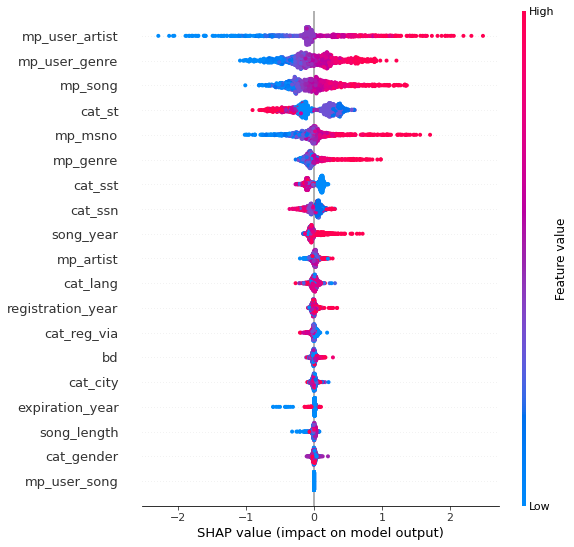

In [50]:
shap.summary_plot(shap_importance[:,:-1], small_data[cat_columns + real_columns])

## Word2Vec